In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [29]:
df=pd.read_csv("MallCustomers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [38]:
df.shape

(200, 5)

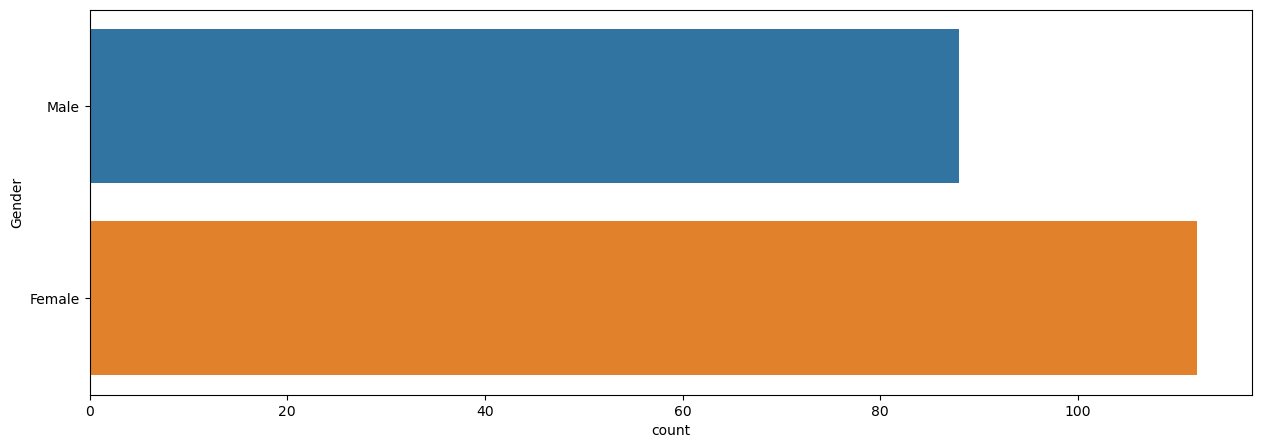

In [39]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [9]:
df['Cluster'] = kmeans.labels_

/var/folders/dg/y9c3v_mj4zdd5tsrwmbjl12w0000gn/T/ipykernel_1862/1957175476.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],


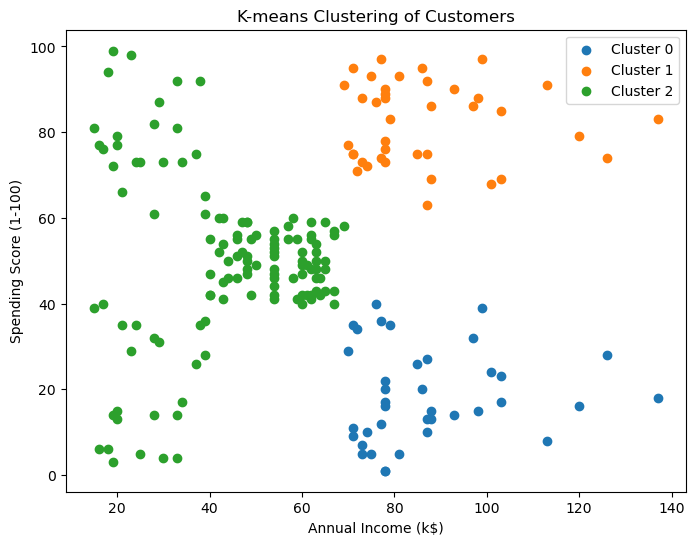

In [14]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', cmap='viridis')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Customers')
plt.legend()
plt.show()

/Users/harini_p/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


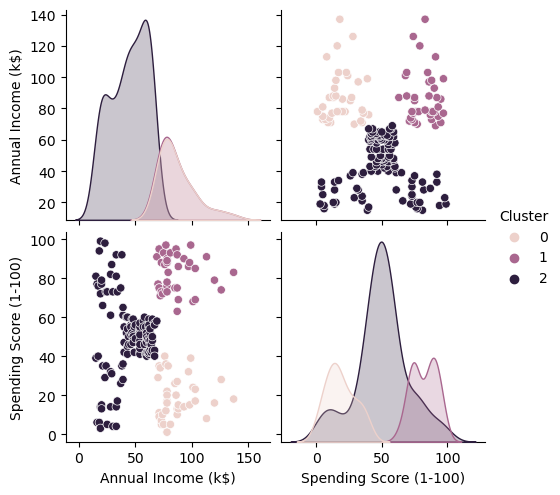

In [20]:
sns.pairplot(df, hue='Cluster', vars=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

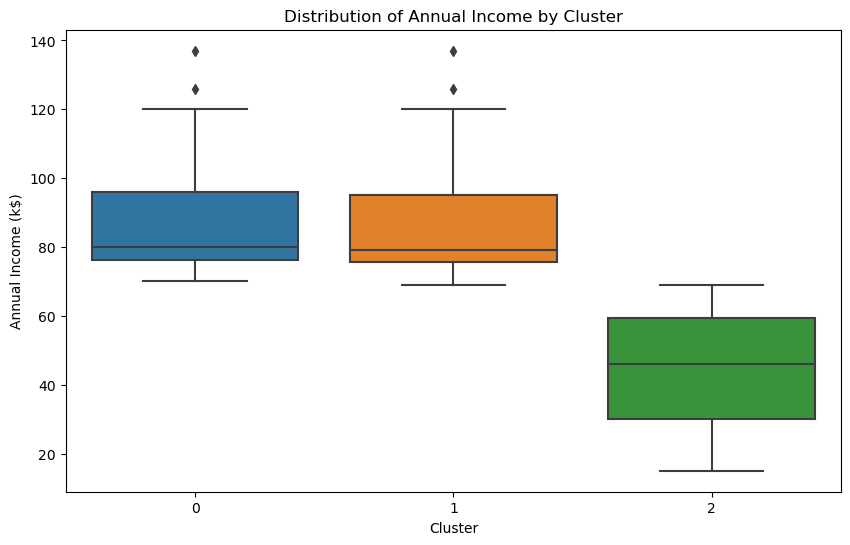

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.title('Distribution of Annual Income by Cluster')
plt.show()

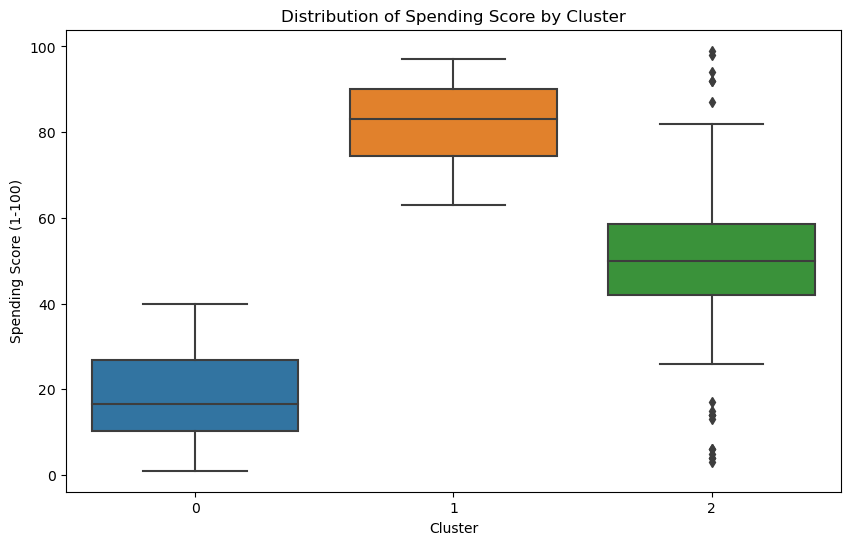

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribution of Spending Score by Cluster')
plt.show()

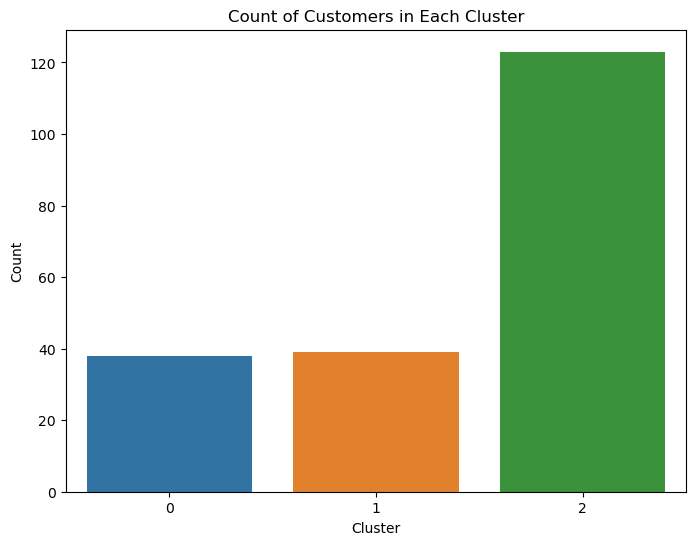

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Customers in Each Cluster')
plt.show()

In [40]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

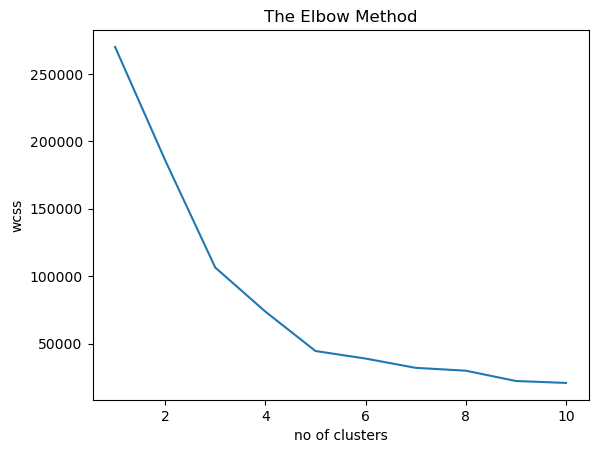

In [41]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()